In [237]:
#columns = firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
df = pd.read_csv("us2022q2a.csv")
df_additional = pd.read_csv("usfirms2022.csv", usecols=["Ticker", "Sector NAICS\nlevel 1", "Name"])
df = df.join(df_additional.set_index("Ticker"), on="firm")
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000.0,1.0,"Agilent Technologies, Inc",Manufacturing
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0,"Agilent Technologies, Inc",Manufacturing
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0,"Agilent Technologies, Inc",Manufacturing
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0,"Agilent Technologies, Inc",Manufacturing
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324445,ZYNE,2022q2,0.0,0.0,9.168770e+03,0.0,-775.927860,-91.691,0.0,67006.959,...,237.414,57241.873,1.140000,1.1400,43595.959,6.0,2022.0,2.0,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [238]:
df.isna().sum()

firm                          1
q                             1
revenue                  165833
cogs                     166138
sgae                     166138
otheropexp               166136
extraincome              165834
finexp                   165833
incometax                165833
totalassets              164639
totalliabilities         164639
shortdebt                194770
longdebt                 164852
stockholderequity        164707
adjprice                 165293
originalprice            165213
sharesoutstanding        166625
fiscalmonth              164633
year                          1
cto                           1
Name                        631
Sector NAICS\nlevel 1       631
dtype: int64

In [239]:
df.dropna(inplace=True)
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0,"Agilent Technologies, Inc",Manufacturing
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0,"Agilent Technologies, Inc",Manufacturing
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0,"Agilent Technologies, Inc",Manufacturing
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0,"Agilent Technologies, Inc",Manufacturing
5,A,2001q2,2382000.0,1406000.0,1.038000e+06,0.0,273000.000000,0.000,115000.0,9080000.000,...,0.000,5616000.000,19.925522,32.5000,457072.749,6.0,2001.0,2.0,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324441,ZYNE,2021q2,0.0,0.0,9.838494e+03,0.0,-117.528220,-5.943,0.0,98195.904,...,468.385,87699.257,5.290000,5.2900,41251.537,6.0,2021.0,2.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [240]:
df['qdate'] = pd.PeriodIndex(df['q'], freq="Q")
df.set_index(['firm'], inplace=True)

In [241]:
#nuevas variables usadas en el ejercicio

df['lprice'] = df.groupby(['firm'])['adjprice'].shift(4)
df['lrevenue'] = df.groupby(['firm'])['revenue'].shift(4)
df['ebit'] = df["revenue"] - df["cogs"] - df["sgae"] - df["otheropexp"]
df['lebit'] = df.groupby(['firm'])['ebit'].shift(4)
df['netincome'] = df["revenue"] - df["cogs"] - df["sgae"] - df["otheropexp"] - df["incometax"] - df["finexp"] + df["extraincome"]
df["bookvalue"] = df["totalassets"] - df["totalliabilities"]
df["marketvalue"] = df["originalprice"] * df["sharesoutstanding"]
df["ccstockreturns"] = np.log(df["adjprice"]) - np.log(df["adjprice"].shift(4))
df["f1"] = df["ccstockreturns"].shift(-1)
df[['q', "Sector NAICS\nlevel 1",'adjprice', 'lprice', 'revenue', 'lrevenue', 'ebit', 'lebit', "ccstockreturns", "f1", "bookvalue", "marketvalue", "netincome"]].head()

,q,Sector NAICS\nlevel 1,adjprice,lprice,revenue,lrevenue,ebit,lebit,ccstockreturns,f1,bookvalue,marketvalue,netincome
firm,,,,,,,,,,,,,
A,2000q2,Manufacturing,45.215607,NaN,2485000.0,NaN,214000.0,NaN,NaN,NaN,4642000.0,3.335506e+07,166000.0
A,2000q3,Manufacturing,30.003238,NaN,2670000.0,NaN,210000.0,NaN,NaN,NaN,4902000.0,2.216940e+07,155000.0
A,2000q4,Manufacturing,33.566841,NaN,3372000.0,NaN,458000.0,NaN,NaN,NaN,5265000.0,2.498606e+07,305000.0
A,2001q1,Manufacturing,18.840347,NaN,2841000.0,NaN,279000.0,NaN,NaN,-0.819441,5541000.0,1.403653e+07,154000.0
A,2001q2,Manufacturing,19.925522,45.215607,2382000.0,2485000.0,-62000.0,214000.0,-0.819441,-0.917569,5616000.0,1.485486e+07,96000.0


In [242]:
# firm size variable dark magic

def condition(row):
	if row["marketvalue"] > row["second_third"]:
		return "Big"
	elif row["marketvalue"] < row["first_third"]:
		return "Small"
	else:
		return "Medium"	

first_third, second_third = df.groupby("q")["marketvalue"].quantile(0.33), df.groupby("q")["marketvalue"].quantile(0.66)
first_third, second_third = pd.DataFrame(first_third), pd.DataFrame(second_third)

first_third.rename(columns = {"marketvalue": "first_third"}, inplace=True)
second_third.rename(columns = {"marketvalue": "second_third"}, inplace=True)
first_third.reset_index(inplace=True)
second_third.reset_index(inplace=True)

thirds = first_third.join(second_third.set_index("q"), on="q")
df = df.join(thirds.set_index("q"), on="q")

df["size"] = df.apply(condition, axis=1)

In [243]:

df_by_year = df.groupby(["firm", np.arange(len(df))//4]).agg({"qdate": "first", "revenue": "sum","cogs":"sum", "sgae": "sum", "otheropexp": "sum", "extraincome": "sum", "finexp": "sum","incometax": "sum", "totalassets": "last", "totalliabilities": "last", "shortdebt": "last", "longdebt": "last", "stockholderequity": "last", "adjprice": "last", "originalprice": "last", "sharesoutstanding": "last", "bookvalue": "last", "marketvalue": "last", "Name": "first", "Sector NAICS\nlevel 1": "first", "lprice": "last", "lrevenue": "sum", "ebit": "sum", "lebit": "sum", "size": "last" }).copy()
df_by_year.reset_index(inplace=True)
df_by_year['qdate'] = df_by_year['qdate'].astype(str).str[0:4]
df_by_year.set_index(['firm','qdate'], inplace=True)
df_by_year.drop(["level_1"], axis=1, inplace=True)
last_year = df_by_year.groupby("firm").last()
last_year.head()

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,...,sharesoutstanding,bookvalue,marketvalue,Name,Sector NAICS\nlevel 1,lprice,lrevenue,ebit,lebit,size
firm,,,,,,,,,,,,,,,,,,,,,
A,4941000.0,2270000.0,1540000.0,0.0,29000.0,60000.0,101000.0,10455000.0,5333000.0,175000.0,...,298708.056,5122000.0,3.547756e+07,"Agilent Technologies, Inc",Manufacturing,146.747733,4556000.0,1131000.0,915000.0,Big
AA,6937000.0,4948000.0,433000.0,50000.0,11000.0,55000.0,444000.0,15709000.0,8417000.0,1000.0,...,184448.686,7292000.0,8.407171e+06,Alcoa Corp,Manufacturing,36.582200,5703000.0,1506000.0,753000.0,Big
AAL,13422000.0,0.0,12405000.0,0.0,25000.0,439000.0,127000.0,67963000.0,76385000.0,2106000.0,...,649514.848,-8422000.0,8.235848e+06,American Airlines Group Inc,Transportation and Warehousing,21.210000,7478000.0,1017000.0,441000.0,Big
AAOI,212216.0,178344.0,90088.0,0.0,896.0,5533.0,2.0,434755.0,215161.0,54607.0,...,27634.082,219594.0,4.283283e+04,"Applied Optoelectronics, Inc",Manufacturing,8.470000,232823.0,-56216.0,-47627.0,Small
AAON,666438.0,510432.0,86996.0,-33.0,246.0,871.0,12646.0,776712.0,286206.0,0.0,...,53071.178,490506.0,2.906178e+06,"Aaon, Inc",Manufacturing,62.220099,511136.0,69043.0,95522.0,Big


In [244]:
temporal_df = last_year
temporal_df[["cogs", "sgae", "otheropexp"]] = last_year[["cogs", "sgae", "otheropexp"]].clip(lower=0)
last_year["operatingmargin"] = (last_year["revenue"] - temporal_df["cogs"] - temporal_df["sgae"] - temporal_df["otheropexp"]) / last_year["revenue"] 
last_year.replace([-np.inf, np.inf], np.nan, inplace=True)
last_year[["Sector NAICS\nlevel 1", "revenue", "cogs", "sgae", "otheropexp", "operatingmargin"]]
#SE CAMBIAN LOS NEGATIVOS DE cogs, sgae Y otheropexp A 0. ESTO PARA QUE NO DEN UN operating profit margin MAYOR A 1 QUE ES INCORRECTO POR DEFINICIÓN. NO ES LA SOLUCIÓN MÁS IDEAL PERO SIN MÁS INFORMACIÓN EXTRA DE CÓMO SURGEN ESTOS DATOS NO SE PUEDE HACER NADA MÁS

,Sector NAICS\nlevel 1,revenue,cogs,sgae,otheropexp,operatingmargin
firm,,,,,,
A,Manufacturing,4941000.0,2270000.0,1.540000e+06,0.0,0.228901
AA,Manufacturing,6937000.0,4948000.0,4.330000e+05,50000.0,0.217097
AAL,Transportation and Warehousing,13422000.0,0.0,1.240500e+07,0.0,0.075771
AAOI,Manufacturing,212216.0,178344.0,9.008800e+04,0.0,-0.264900
AAON,Manufacturing,666438.0,510432.0,8.699600e+04,0.0,0.103551
...,...,...,...,...,...,...
ZVIA,Manufacturing,83576.0,51581.0,4.734900e+04,16944.0,-0.386451
ZVO,Educational Services,113013.0,74824.0,5.514400e+04,0.0,-0.150027
ZWS,Manufacturing,-216900.0,0.0,0.000000e+00,1400.0,1.006455


# 2.2.1 About descriptive statistics:

## 2.2.1.1 Considering the most recent financial quarter of the dataset:
### Show how many firms by industry there are in the sample

In [245]:
industries_last_year = last_year.groupby("Sector NAICS\nlevel 1")
count_industries = industries_last_year["Sector NAICS\nlevel 1"].count().sort_values(ascending=False)
count_industries = pd.concat([pd.Series([count_industries.sum()], index=["General"]) ,count_industries])
count_industries

General                                                                     2969
Manufacturing                                                               1530
Information                                                                  260
Retail Trade                                                                 152
Professional, Scientific, and Technical Services                             144
Finance and Insurance                                                        140
Administrative and Support and Waste Management and Remediation Services     130
Mining, Quarrying, and Oil and Gas Extraction                                103
Wholesale Trade                                                               79
Utilities                                                                     77
Transportation and Warehousing                                                69
Accommodation and Food Services                                               66
Health Care and Social Assis

### For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?

In [246]:
bookvalue_last_quarter = last_year.groupby("Sector NAICS\nlevel 1")["bookvalue"].describe()
bookvalue_general = last_year["bookvalue"].describe().rename("General")
bookvalue_last_quarter = pd.concat([bookvalue_general.to_frame().T, bookvalue_last_quarter])
bookvalue_last_quarter

,count,mean,std,min,25%,50%,75%,max
General,2969.0,2.810302e+06,1.124976e+07,-14791000.0,7.134500e+04,3.755530e+05,1488700.00,255419000.0
Accommodation and Food Services,66.0,4.376664e+05,2.446652e+06,-8658900.0,1.324508e+04,2.274610e+05,600194.50,7289000.0
Administrative and Support and Waste Management and Remediation Services,130.0,2.699966e+06,7.168452e+06,-1026446.0,7.763000e+04,5.250860e+05,1855890.75,46515000.0
"Agriculture, Forestry, Fishing and Hunting",16.0,3.406701e+06,6.635579e+06,14751.0,2.128192e+05,1.068506e+06,3222425.00,26071000.0
"Arts, Entertainment, and Recreation",21.0,5.061617e+06,2.096327e+07,-1081020.0,-1.053470e+05,7.616800e+04,1678528.00,96433000.0
Construction,44.0,2.533252e+06,4.272329e+06,83162.0,4.109848e+05,9.981465e+05,2585043.50,21789774.0
Educational Services,14.0,8.931767e+05,1.110081e+06,6605.0,2.377335e+05,6.496990e+05,966118.00,4322243.0
Finance and Insurance,140.0,4.874033e+06,1.049381e+07,-5438611.0,3.415530e+05,1.156818e+06,4126307.50,76205000.0
Health Care and Social Assistance,64.0,1.032707e+06,1.861076e+06,-1656000.0,7.764775e+04,4.440655e+05,1161768.25,10400700.0
Information,260.0,4.026827e+06,1.675064e+07,-5768000.0,1.353823e+05,4.828245e+05,1306655.25,166542000.0


<AxesSubplot:>

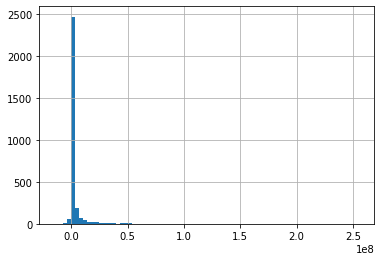

In [247]:
last_year["bookvalue"].hist(bins=75)

array([[<AxesSubplot:title={'center':'Accommodation and Food Services'}>,
        <AxesSubplot:title={'center':'Administrative and Support and Waste Management and Remediation Services'}>,
        <AxesSubplot:title={'center':'Agriculture, Forestry, Fishing and Hunting'}>,
        <AxesSubplot:title={'center':'Arts, Entertainment, and Recreation'}>],
       [<AxesSubplot:title={'center':'Construction'}>,
        <AxesSubplot:title={'center':'Educational Services'}>,
        <AxesSubplot:title={'center':'Finance and Insurance'}>,
        <AxesSubplot:title={'center':'Health Care and Social Assistance'}>],
       [<AxesSubplot:title={'center':'Information'}>,
        <AxesSubplot:title={'center':'Manufacturing'}>,
        <AxesSubplot:title={'center':'Mining, Quarrying, and Oil and Gas Extraction'}>,
        <AxesSubplot:title={'center':'Other Services (except Public Administration)'}>],
       [<AxesSubplot:title={'center':'Professional, Scientific, and Technical Services'}>,
        <A

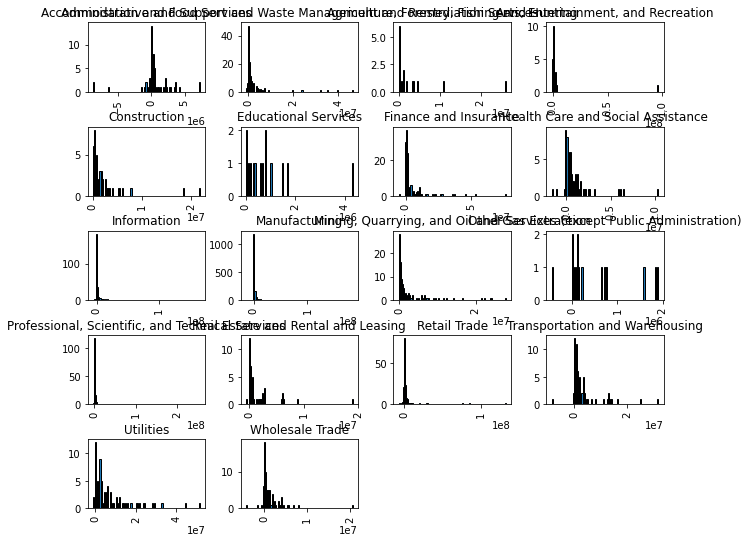

In [248]:
last_year["bookvalue"].hist(by=last_year["Sector NAICS\nlevel 1"], figsize=(10,9), ec="k", bins=100)

In [249]:
marketvalue_last_quarter = last_year.groupby("Sector NAICS\nlevel 1")["marketvalue"].describe()
marketvalue_general = last_year["marketvalue"].describe().rename("General")
marketvalue_last_quarter = pd.concat([marketvalue_general.to_frame().T, marketvalue_last_quarter])
marketvalue_last_quarter

,count,mean,std,min,25%,50%,75%,max
General,2969.0,1.184380e+07,7.178993e+07,34.900000,1.697871e+05,1.105860e+06,4.771844e+06,2.212838e+09
Accommodation and Food Services,66.0,9.013757e+06,2.559260e+07,11047.311660,2.998144e+05,1.434429e+06,5.384146e+06,1.816339e+08
Administrative and Support and Waste Management and Remediation Services,130.0,1.398184e+07,4.492164e+07,6078.575024,5.285672e+05,2.032185e+06,6.482678e+06,3.743426e+08
"Agriculture, Forestry, Fishing and Hunting",16.0,8.049362e+06,1.457046e+07,22188.918000,2.645742e+05,1.264045e+06,5.211223e+06,4.505560e+07
"Arts, Entertainment, and Recreation",21.0,1.343285e+07,3.687909e+07,7425.361076,1.146178e+06,2.849838e+06,8.776708e+06,1.719481e+08
Construction,44.0,3.940954e+06,5.683502e+06,20269.583260,6.543235e+05,1.900822e+06,3.874364e+06,2.330088e+07
Educational Services,14.0,1.302581e+06,1.039264e+06,33076.498557,2.528720e+05,1.524843e+06,1.869224e+06,3.044160e+06
Finance and Insurance,140.0,1.452031e+07,4.552555e+07,12450.765460,5.913862e+05,2.697928e+06,9.830132e+06,4.818731e+08
Health Care and Social Assistance,64.0,3.496784e+06,6.971670e+06,10153.060460,1.530626e+05,1.378546e+06,4.291806e+06,4.965911e+07
Information,260.0,1.932010e+07,1.223585e+08,10941.657291,7.279416e+05,2.546684e+06,7.757159e+06,1.920840e+09


<AxesSubplot:>

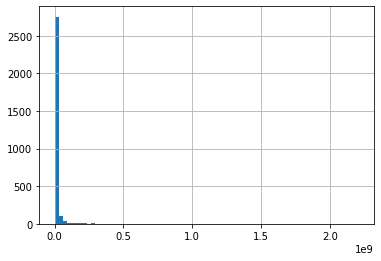

In [250]:
last_year["marketvalue"].hist(bins=75)

array([[<AxesSubplot:title={'center':'Accommodation and Food Services'}>,
        <AxesSubplot:title={'center':'Administrative and Support and Waste Management and Remediation Services'}>,
        <AxesSubplot:title={'center':'Agriculture, Forestry, Fishing and Hunting'}>,
        <AxesSubplot:title={'center':'Arts, Entertainment, and Recreation'}>],
       [<AxesSubplot:title={'center':'Construction'}>,
        <AxesSubplot:title={'center':'Educational Services'}>,
        <AxesSubplot:title={'center':'Finance and Insurance'}>,
        <AxesSubplot:title={'center':'Health Care and Social Assistance'}>],
       [<AxesSubplot:title={'center':'Information'}>,
        <AxesSubplot:title={'center':'Manufacturing'}>,
        <AxesSubplot:title={'center':'Mining, Quarrying, and Oil and Gas Extraction'}>,
        <AxesSubplot:title={'center':'Other Services (except Public Administration)'}>],
       [<AxesSubplot:title={'center':'Professional, Scientific, and Technical Services'}>,
        <A

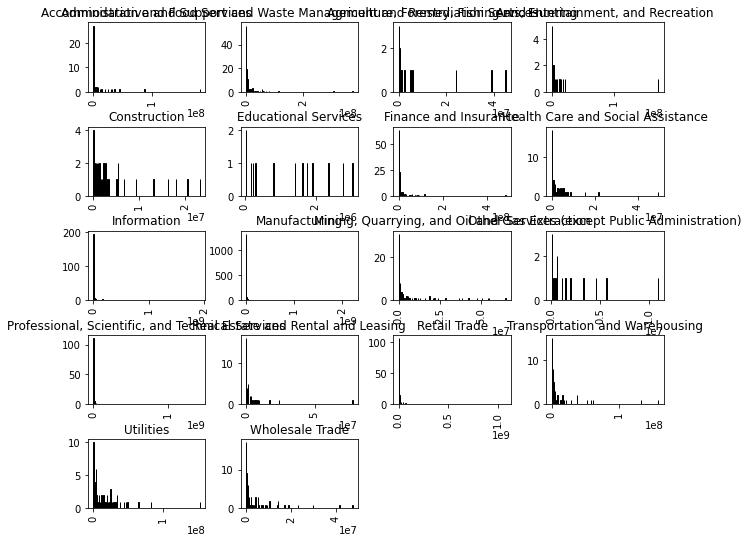

In [251]:
last_year["marketvalue"].hist(by=last_year["Sector NAICS\nlevel 1"], figsize=(10,9), ec="k", bins=250)

SE PUEDE VER EN LAS INDUSTRIAS CON UN BUEN NÚMERO DE EMPRESAS QUE EN LAS DOS MÉTRICAS SE TIENE UNA DISTRIBUCIÓN NORMAL SESGADA A LA DERECHA. POR ESTA MISMA RAZÓN, SE TIENE UNA IDEA MÁS CLARA DE LA EMPRESA TÍPICA SI NOS BASAMOS EN LA MEDIANA EN VEZ DE LA MEDIA. 
LA INDUSTRIA CON MÁS EMPRESAS ES MANUFACTURING, LA CUAL CUBRE MÁS DE 50% DE LAS EMPRESAS; LA QUE TIENE MENOS ES OTHER EDUCATIONAL SERVICES CON 14. 
LA INDUSTRIA CON MAYOR MEDIANA EN MARKET VALUE ES UTILITIES CON 6 MIL MILLONES, EN BOOK VALUE ES IGUALMENTE UTILITIES CON 2.8 MIL MILLONES; EN ESTE PUNTO SE PUEDE VER COMO ESTAS DOS MÉTRICAS ESTÁN CORRELACIONADAS.
EN BOOK VALUE SE PUEDE VER QUE LA EMPRESA TÍPICA DE CUALQUIER INDUSTRIA ESTÁ ENTRE 70 MILLONES Y 2.8 MIL MILLONES (ARTES QUE ES EL MENOR CON 70 MILLONES ES UN VALOR ATÍPICO, PROBABLEMENTE POR NO CONTAR CON BASTANTES ACTIVOS). 
EN MARKET VALUE ENTRE 500 MILLONES Y 6 MIL MILLONES. 
EN MARKET VALUE LA INDUSTRIA CON MAYOR DESVIACIÓN ESTÁNDAR ES "PROFESSIONAL, SCIENTIFIC AND TECHNICAL SERVICES" CON 124 MIL MILLONES Y LA MENOR ES EDUCATIONAL SERVICES CON 1.3 MIL MILLONES. 
EN BOOK VALUE LA MAYOR ES IGUALMENTE "PROFESSIONA, SCIENTIFIC AND TECHNICAL SERVICES" CON 23 MIL MILLONES Y LA MENOR ES IGUALMENTE EDUCATION CON 1.1 MIL MILLONES.

### For each industry (and for all industries), what can you say about profit margin of firms? show a) descriptive statistics of profit margin and b) plot(s) to illustrate how profit margin changes across industries. 

In [252]:
last_year.groupby("Sector NAICS\nlevel 1")["operatingmargin"].describe()

operatingmargin_last_quarter = last_year.groupby("Sector NAICS\nlevel 1")["operatingmargin"].describe()
operatingmargin_general = last_year["operatingmargin"].describe().rename("General")
operatingmargin_last_quarter = pd.concat([operatingmargin_general.to_frame().T, operatingmargin_last_quarter])
operatingmargin_last_quarter

,count,mean,std,min,25%,50%,75%,max
General,2717.0,21.051519,1599.798432,-2274.914286,-0.182705,0.047011,0.144632,83242.000000
Accommodation and Food Services,66.0,0.079903,0.167041,-0.589221,0.022516,0.076932,0.158747,0.423647
Administrative and Support and Waste Management and Remediation Services,130.0,-0.834649,7.683241,-84.128947,-0.034491,0.058694,0.143711,0.618778
"Agriculture, Forestry, Fishing and Hunting",16.0,-0.080686,0.328882,-1.192328,-0.091354,0.009550,0.090129,0.167108
"Arts, Entertainment, and Recreation",21.0,-0.100582,0.596936,-2.043234,-0.036147,0.112280,0.223518,0.415476
Construction,44.0,0.111892,0.114226,-0.144403,0.035255,0.093662,0.163385,0.539738
Educational Services,14.0,-0.008109,0.307771,-0.944201,-0.039941,0.037402,0.111229,0.328612
Finance and Insurance,137.0,0.149188,0.494235,-3.309726,0.023555,0.197996,0.354257,0.948587
Health Care and Social Assistance,62.0,-6.390713,35.361540,-257.697183,-0.354528,0.004185,0.102009,3.627698
Information,258.0,-0.988185,9.867656,-153.453537,-0.295330,-0.044872,0.092452,1.000000


array([[<AxesSubplot:title={'center':'Accommodation and Food Services'}>,
        <AxesSubplot:title={'center':'Administrative and Support and Waste Management and Remediation Services'}>,
        <AxesSubplot:title={'center':'Agriculture, Forestry, Fishing and Hunting'}>,
        <AxesSubplot:title={'center':'Arts, Entertainment, and Recreation'}>],
       [<AxesSubplot:title={'center':'Construction'}>,
        <AxesSubplot:title={'center':'Educational Services'}>,
        <AxesSubplot:title={'center':'Finance and Insurance'}>,
        <AxesSubplot:title={'center':'Health Care and Social Assistance'}>],
       [<AxesSubplot:title={'center':'Information'}>,
        <AxesSubplot:title={'center':'Manufacturing'}>,
        <AxesSubplot:title={'center':'Mining, Quarrying, and Oil and Gas Extraction'}>,
        <AxesSubplot:title={'center':'Other Services (except Public Administration)'}>],
       [<AxesSubplot:title={'center':'Professional, Scientific, and Technical Services'}>,
        <A

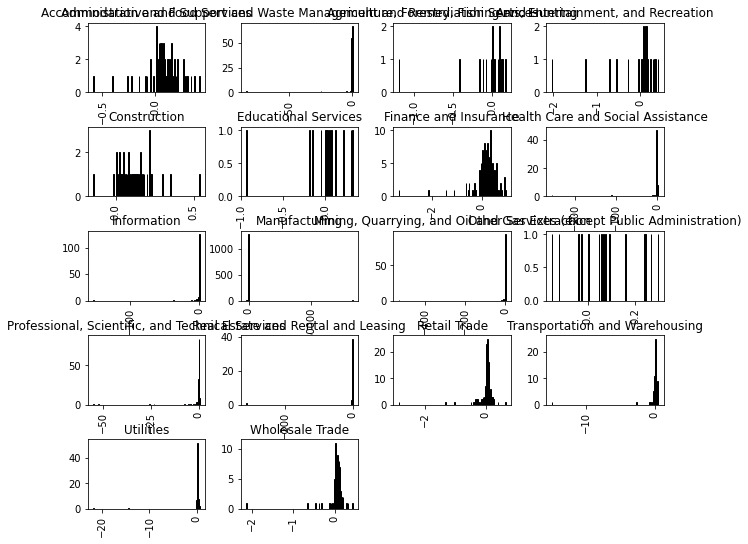

In [253]:
last_year["operatingmargin"].hist(by=last_year["Sector NAICS\nlevel 1"], figsize=(10,9), ec="k", bins=150)

SE PUEDE VER QUE LA DISTRIBUCIÓN POR INDUSTRIA SE VE MÁS NORMAL QUE EN LAS MÉTRICAS ANTERIORES (AUNQUE SE PUEDE NOTAR UN POCO DE SESGO, ESTA VEZ A LA IZQUIERDA). EN LA MAYORÍA DE LAS EMPRESAS HAY UNA MEDIANA LIGERAMENTE ENCIMA DEL 0. POR LA FORMA EN QUE FUNCIONA LA FÓRMULA, LOS VALORES EXTREMOS POR EL LADO DERECHO SE ACABAN ANTES DEL 1 POR LO QUE NO CAMBIAN MUCHO EL PROMEDIO PERO DEL LADO IZQUIERDO SE PUEDEN VER ALGUNOS VALORES MUY EXTREMOS COMO EN EL CASO DE INFORMATION O MANUFACTURING. SI NOS BASAMOS EN LA MEDIANA, PODEMOS DECIR QUE LA ÚNICA INDUSTRIA EN QUE LA EMPRESA TIPICA TIENE UN MAL OPERATING MARGIN ES INFORMATION (ESTO ES PORQUE TIENEN UN OPERATING MARGIN NEGATIVO). TAMBIÉN SE PUEDE DECIR QUE LA MAYORÍA DE LAS EMPRESAS EN FINANCE TIENEN MUY BUEN OPERATING MARGIN PORQUE ES DE LAS POCAS INDUSTRIAS QUE TIENE UN VALOR POSITIVO EN 25% Y TIENE DE LOS MEJORES MARGENES EN 50% Y 75%.

### Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

In [254]:
sorted_market_value = last_year.sort_values(by=["marketvalue"], ascending=False)
top_ten_market_value = sorted_market_value.head(10)["marketvalue"]
top_ten_market_value

firm
AAPL     2.212838e+09
MSFT     1.920840e+09
GOOGL    1.435042e+09
AMZN     1.080624e+09
TSLA     6.976698e+08
UNH      4.818731e+08
JNJ      4.671001e+08
META     4.363946e+08
NVDA     3.789750e+08
V        3.743426e+08
Name: marketvalue, dtype: float64

<AxesSubplot:>

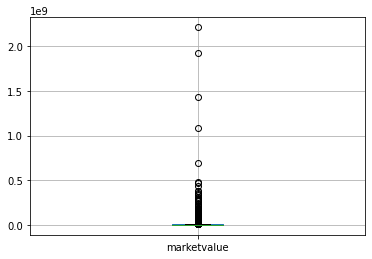

In [255]:
last_year.boxplot(column=["marketvalue"])

In [256]:
last_year["marketvalue"].describe()

count    2.969000e+03
mean     1.184380e+07
std      7.178993e+07
min      3.490000e+01
25%      1.697871e+05
50%      1.105860e+06
75%      4.771844e+06
max      2.212838e+09
Name: marketvalue, dtype: float64

In [257]:
(top_ten_market_value - last_year["marketvalue"].median()) / last_year["marketvalue"].std()

firm
AAPL     30.808390
MSFT     26.740997
GOOGL    19.974064
AMZN     15.037182
TSLA      9.702809
UNH       6.696862
JNJ       6.491082
META      6.063368
NVDA      5.263540
V         5.199013
Name: marketvalue, dtype: float64

LA MEJOR EMPRESA EN CUANTO A MARKET VALUE ES APPLE. EL VALOR DEL TOP 3 ESTÁ ARRIBA DE 10 DESVIACIONES ESTÁNDAR, CONSIDERANDO QUE EN LA DISTRIBUCIÓN NORMAL 3 DESVIACIONES ESTÁNDAR DE ARRIBA Y ABAJO SON EL 99.73%, ESTAS EMPRESAS SON TOTALMENTE FUERA DE SERIE EN LA INDUSTRIA

### Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

In [258]:
sorted_book_value = last_year.sort_values(by=["bookvalue"], ascending=False)
top_ten_book_value = sorted_book_value.head(10)["bookvalue"]
top_ten_book_value

firm
GOOGL    255419000.0
XOM      184508000.0
MSFT     166542000.0
CVX      154562000.0
T        135307000.0
AMZN     131402000.0
META     125767000.0
INTC     101218000.0
DIS       96433000.0
CMCSA     92559000.0
Name: bookvalue, dtype: float64

<AxesSubplot:>

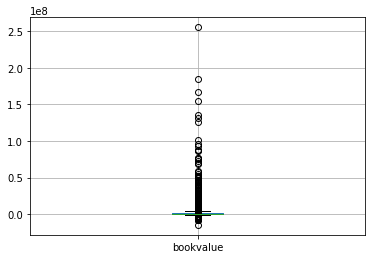

In [259]:
last_year.boxplot(column=["bookvalue"])

In [260]:

last_year["bookvalue"].describe()

count    2.969000e+03
mean     2.810302e+06
std      1.124976e+07
min     -1.479100e+07
25%      7.134500e+04
50%      3.755530e+05
75%      1.488700e+06
max      2.554190e+08
Name: bookvalue, dtype: float64

In [261]:
(top_ten_book_value - last_year["bookvalue"].median()) / last_year["bookvalue"].std()

firm
GOOGL    22.671018
XOM      16.367682
MSFT     14.770669
CVX      13.705758
T        11.994165
AMZN     11.647046
META     11.146147
INTC      8.963966
DIS       8.538624
CMCSA     8.194261
Name: bookvalue, dtype: float64

LA MEJOR EMPRESA EN CUANTO A BOOKVALUE ES GOOGLE. SE PUEDE NOTAR QUE BOOKVALUE TIENE LOS VALORES MÁXIMOS A MENOS DESVIACIONES ESTÁNDAR, TAMBIÉN SE PUEDE NOTAR QUE LOS VALORES ESTÁN MÁS JUNTOS POR LO QUE TAL VEZ ESTÁ MENOS SESGADA A LA DERECHA. LA EXPLICACIÓN PROBABLE DE ESTO ES QUE LOS VALORES DE LIBRO SON MÁS ESTÁTICOS COMPARADOS CON LAS ACCIONES QUE PUEDEN SER MÁS VOLÁTILES

## 2.2.1.2 Considering the whole history of financial data for all firms:
### How can you measure firm profitability that can be used to compare performance among firms of different sizes? Select and justify at least 3 measures and show descriptive statistics

In [262]:
df["salesannualgrowth"] = (df["revenue"] / df["lrevenue"]) -1
df["salesannualgrowth"].replace([-np.inf, np.inf], np.nan, inplace=True)
df.groupby(["firm"])["salesannualgrowth"].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,83.0,-0.005484,0.186550,-0.507711,-0.040520,0.033393,0.083155,0.350471
AA,19.0,0.064593,0.220120,-0.271531,-0.122188,0.143725,0.251460,0.396321
AAL,31.0,0.209944,0.839148,-0.864381,-0.041373,0.026808,0.076168,3.610358
AAOI,31.0,0.151710,0.412571,-0.505693,-0.187307,0.075363,0.511276,1.124208
AAON,40.0,0.094433,0.131804,-0.157801,0.007072,0.090486,0.147848,0.578497
...,...,...,...,...,...,...,...,...
ZVIA,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZVO,40.0,-0.127468,0.104620,-0.412065,-0.161683,-0.102684,-0.060002,0.038328
ZWS,37.0,-0.086720,0.433378,-2.510400,-0.048450,0.009333,0.033701,0.265420


In [263]:
df["operatingprofitgrowth"] = df["ebit"] / df["lebit"]
df["operatingprofitgrowth"].replace([-np.inf, np.inf], np.nan, inplace=True)
df.groupby(["firm"])["operatingprofitgrowth"].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,83.0,-0.410587,12.780358,-115.000000,0.599336,1.022222,1.323693,5.629032
AA,19.0,0.775802,7.039281,-19.227273,-0.369113,0.717791,1.722391,21.600000
AAL,31.0,0.423083,2.060314,-6.797333,0.483038,0.860936,1.243426,5.341615
AAOI,31.0,0.543282,4.877026,-15.626607,0.175120,0.981836,1.363977,17.375761
AAON,40.0,1.343226,1.453342,0.211642,0.901280,1.114336,1.260393,9.896721
...,...,...,...,...,...,...,...,...
ZVIA,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZVO,40.0,-0.317975,4.431269,-18.639896,-0.333192,0.303690,0.941461,13.582500
ZWS,37.0,0.821474,1.054277,-3.302000,0.676289,1.049465,1.138060,3.497076


In [264]:
df["booktomarketratio"] = df["marketvalue"] / df["bookvalue"]
df.groupby(["firm"])["booktomarketratio"].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,87.0,4.033614,1.663799,1.218792,2.908651,3.718646,4.589229,9.641711
AA,23.0,1.001523,0.541860,0.197081,0.668775,0.854401,1.235776,2.667706
AAL,35.0,-22.034220,114.572674,-659.366959,-1.942174,-0.977897,6.366372,75.055871
AAOI,35.0,1.601930,1.021410,0.195055,0.775548,1.445381,2.110970,3.847648
AAON,44.0,7.108697,1.900514,3.100531,5.938291,7.414075,8.556267,9.920884
...,...,...,...,...,...,...,...,...
ZVIA,4.0,4.123944,1.953162,2.165834,2.976620,3.800278,4.947602,6.729385
ZVO,44.0,1.779457,0.914594,0.476628,1.131696,1.530986,2.212735,5.007797
ZWS,41.0,5.011056,6.038356,1.986670,2.526164,3.407289,4.864945,34.945588


Escogí sales annual growth, operating profit growth y book to market ratio. Escogí las primeras dos porque nos indican cómo cambian las ganancias de la empresa a través del tiempo. Book to market ratio se podría interpretar como que están sacando más ganancia de menos recursos

### Calculate and explain earnings per share deflated by price.

In [265]:
df["epsp"] = (df["netincome"] / df["sharesoutstanding"]) / df["originalprice"]
df.groupby(["firm"])["epsp"].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,87.0,0.006714,0.028015,-0.148001,0.006304,0.008557,0.011181,0.173107
AA,23.0,-0.004386,0.046148,-0.094271,-0.031117,0.008580,0.028508,0.069854
AAL,35.0,-0.035834,0.145175,-0.431488,0.004481,0.021502,0.034171,0.122910
AAOI,35.0,-0.034186,0.073212,-0.337498,-0.062091,-0.003267,0.008468,0.046590
AAON,44.0,0.008121,0.003736,0.001485,0.006071,0.007123,0.009944,0.020090
...,...,...,...,...,...,...,...,...
ZVIA,4.0,-0.043385,0.011082,-0.058721,-0.047900,-0.040027,-0.035512,-0.034767
ZVO,44.0,-0.046185,0.128111,-0.555469,-0.051377,-0.001168,0.019513,0.096468
ZWS,41.0,0.007375,0.010316,-0.025814,0.004470,0.010575,0.012219,0.030176


Esta métrica nos da una idea de qué tan bien va una acción, el dividirlo por el stock price nos permite que no esté a merced de si se dividen las acciones 

# 2.2.2 About statistical modeling

### You have to select a group of firms according to their general industry classification:
### Manufacturing

### Using your subset of firms that belong to your industry, which factors (variables) might be related to annual stock return one quarter in the future? Select at least 3 factors and briefly explain why you think might be related to stock returns.

DV: Continously compounded stock return
IV: Operating profit growth, book to market value, short debts

-Operating profit growth: Uno de los problemas de las variables originales es que solo muestran el estado actual mientras que percibo que el cc stock return depende de qué tanto está creciendo la empresa, este factor me parece el que mejor representa si la empresa está creciendo

-Book to market ratio: Investigando sobre esta variable descubrí que se puede entender que un ratio menor a 1 nos dice que el stock está infravalorado y mayor a 1 que está sobrevalorado, se podría esperar que si uno de estos casos es verdad el mercado se va a dar cuenta y va a estabilizar el stock. ¿Por qué manejo una interpretación distinta en esta sección comparada con la anterior? Algunas industrias que no tienen tantos assets (como finanzas o artes que vimos en un ejemplo anterior) no es muy buena métrica porque no se utilizan bastante assets como fábricas o maquinarias, en cambio en manufactura es una parte esencial del negocio

-Short finacial leverage: Esta es de la que estoy menos seguro pero tengo la hipótesis que se necesita contraer deuda para poder hacer crecer la empresa, más en una industria que depende de los assets como manufactura. Pongo short en vez de long porque va a ser más seguro de determinar cuando va a tener impacto algo que se va a pagar en 20 años.

In [266]:
df = pd.get_dummies(df, columns=["size"], drop_first=True)

In [267]:
df["shortfinancialleverage"] = df["shortdebt"] / df["totalassets"]
df_manufacturing = df[df["Sector NAICS\nlevel 1"] == "Manufacturing"].copy()
df_manufacturing

,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,...,f1,first_third,second_third,salesannualgrowth,operatingprofitgrowth,booktomarketratio,epsp,size_Medium,size_Small,shortfinancialleverage
firm,,,,,,,,,,,,,,,,,,,,,
A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,2679000.000,...,NaN,1.132763e+06,4.884300e+06,NaN,NaN,7.185493,0.004977,0,0,0.069936
A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,2925000.000,...,NaN,1.247909e+06,5.155204e+06,NaN,NaN,4.522522,0.006992,0,0,0.067459
A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,3160000.000,...,NaN,1.274631e+06,4.906373e+06,NaN,NaN,4.745690,0.012207,0,0,0.098516
A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,3667000.000,...,-0.819441,1.142148e+06,4.145031e+06,NaN,NaN,2.533213,0.010971,0,0,0.060382
A,2001q2,2382000.0,1406000.0,1.038000e+06,0.0,273000.000000,0.000,115000.0,9080000.000,3464000.000,...,-0.917569,1.335187e+06,4.931480e+06,-0.041449,-0.289720,2.645097,0.006463,0,0,0.085132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYNE,2021q2,0.0,0.0,9.838494e+03,0.0,-117.528220,-5.943,0.0,98195.904,10496.647,...,0.247615,6.464485e+05,4.172496e+06,NaN,0.450442,2.488284,-0.045596,0,1,0.002100
ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,11309.171,...,-0.136132,5.852894e+05,3.857500e+06,NaN,1.106033,2.222813,-0.060502,0,1,0.002307
ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,10258.173,...,-0.819027,5.447577e+05,3.939717e+06,NaN,0.867208,1.673966,-0.074259,0,1,0.002576


## Do histograms for each factor/variables and interpret them

<AxesSubplot:>

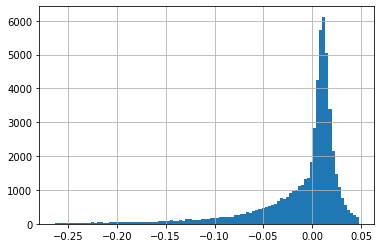

In [268]:
df_manufacturing[(df_manufacturing["epsp"] < df_manufacturing["epsp"].quantile(.975)) & (df_manufacturing["epsp"] > df_manufacturing["epsp"].quantile(.025))]["epsp"].hist(bins=100)
#Se usa entre el 2.5 percentil al 97.5 porque hay valores muy extremos que hacen difícil ver la gráfica

<AxesSubplot:>

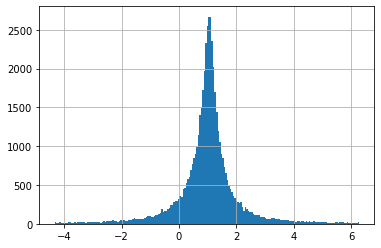

In [269]:
df_manufacturing[(df_manufacturing["operatingprofitgrowth"] < df_manufacturing["operatingprofitgrowth"].quantile(.975)) & (df_manufacturing["operatingprofitgrowth"] > df_manufacturing["operatingprofitgrowth"].quantile(.025))]["operatingprofitgrowth"].hist(bins=200)

<AxesSubplot:>

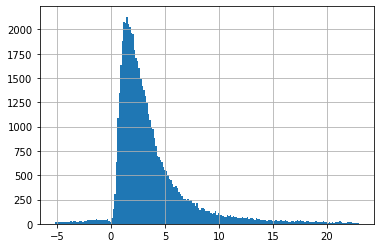

In [270]:
df_manufacturing[(df_manufacturing["booktomarketratio"] < df_manufacturing["booktomarketratio"].quantile(.975)) & (df_manufacturing["booktomarketratio"] > df_manufacturing["booktomarketratio"].quantile(.025))]["booktomarketratio"].hist(bins=200)

<AxesSubplot:>

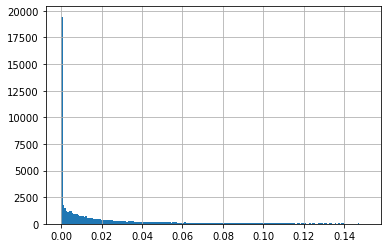

In [271]:

df_manufacturing[(df_manufacturing["shortfinancialleverage"] < df_manufacturing["shortfinancialleverage"].quantile(.95))]["shortfinancialleverage"].hist(bins=200)

0.05918474718687018 4.310001808748416


count    57545.000000
mean        -0.011680
std          0.047482
min         -0.263793
25%         -0.020297
50%          0.006463
75%          0.014213
max          0.047827
Name: epsp, dtype: float64

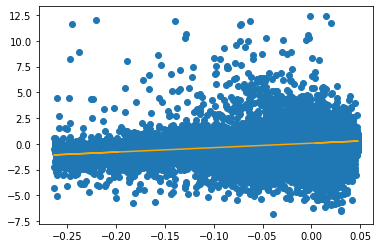

In [272]:
plt.clf()
tmp_df_manufacturing = df_manufacturing[(df_manufacturing["epsp"] < df_manufacturing["epsp"].quantile(.975)) & (df_manufacturing["epsp"] > df_manufacturing["epsp"].quantile(.025))]
x = tmp_df_manufacturing["epsp"]
y = tmp_df_manufacturing["ccstockreturns"]

idx = np.isfinite(x) & np.isfinite(y)

b1,b0 = np.polyfit(x[idx],y[idx],1)
yfit = b0+b1*x

print(b0, b1)
plt.plot(x, yfit,c="orange")

plt.scatter(x,y)
x.describe()

-0.05356353156499096 0.04800046541561663


count    51815.000000
mean         0.996716
std          1.117168
min         -4.332000
25%          0.645994
50%          1.030687
75%          1.357377
max          6.281525
Name: operatingprofitgrowth, dtype: float64

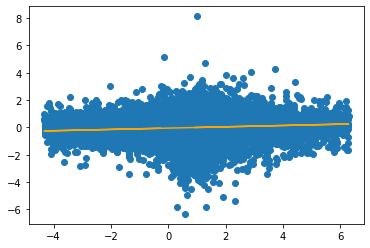

In [273]:
plt.clf()
tmp_df_manufacturing = df_manufacturing[(df_manufacturing["operatingprofitgrowth"] < df_manufacturing["operatingprofitgrowth"].quantile(.975)) & (df_manufacturing["operatingprofitgrowth"] > df_manufacturing["operatingprofitgrowth"].quantile(.025))]
x = tmp_df_manufacturing["operatingprofitgrowth"]
y = tmp_df_manufacturing["ccstockreturns"]

b1,b0 = np.polyfit(x,y,1)
yfit = b0+b1*x

print(b0, b1)
plt.plot(x, yfit,c="orange")

plt.scatter(x,y)
x.describe()

-0.2152325410830432 0.04903275886216347


count    57545.000000
mean         3.640665
std          3.466788
min         -5.198295
25%          1.562673
50%          2.652317
75%          4.497302
max         22.987604
Name: booktomarketratio, dtype: float64

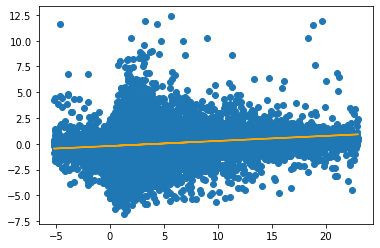

In [274]:
plt.clf()
tmp_df_manufacturing = df_manufacturing[(df_manufacturing["booktomarketratio"] < df_manufacturing["booktomarketratio"].quantile(.975)) & (df_manufacturing["booktomarketratio"] > df_manufacturing["booktomarketratio"].quantile(.025))]
x = tmp_df_manufacturing["booktomarketratio"]
y = tmp_df_manufacturing["ccstockreturns"]

idx = np.isfinite(x) & np.isfinite(y)

b1,b0 = np.polyfit(x[idx],y[idx],1)
yfit = b0+b1*x

print(b0, b1)
plt.plot(x, yfit,c="orange")

plt.scatter(x,y)
df_manufacturing[["booktomarketratio", "ccstockreturns"]].describe()
x.describe()

0.01328813254637743 -0.7136150106601161


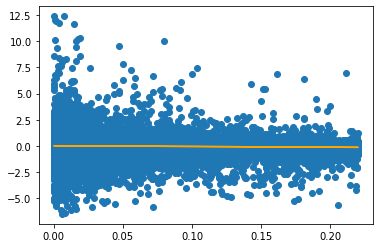

In [275]:
plt.clf()
tmp_df_manufacturing = df_manufacturing[(df_manufacturing["shortfinancialleverage"] < df_manufacturing["shortfinancialleverage"].quantile(.975)) & (df_manufacturing["shortfinancialleverage"] > df_manufacturing["shortfinancialleverage"].quantile(.025))]
x = tmp_df_manufacturing["shortfinancialleverage"]
y = tmp_df_manufacturing["ccstockreturns"]
idx = np.isfinite(x) & np.isfinite(y) #para borrar un valor en y que hace que no funcione

b1,b0 = np.polyfit(x[idx],y[idx],1)
yfit = b0+b1*x

print(b0, b1)
plt.plot(x, yfit,c="orange")

plt.scatter(x,y)

In [276]:
df_manufacturing[["epsp", "operatingprofitgrowth", "booktomarketratio", "shortfinancialleverage"]].describe()

,epsp,operatingprofitgrowth,booktomarketratio,shortfinancialleverage
count,60575.000000,54544.000000,6.057500e+04,60575.000000
mean,-4.409587,1.507821,inf,0.086181
std,1083.854058,53.924709,NaN,6.737373
min,-266755.602988,-2367.760000,-2.369956e+04,0.000000
25%,-0.022938,0.609010,1.514896e+00,0.000000
50%,0.006463,1.030682,2.652317e+00,0.007552
75%,0.014655,1.387828,4.657076e+00,0.033037
max,1138.852581,8774.386528,inf,1563.227926


### Design and run a multiple regression model to examine whether your selected factors and earnings per share deflated by price can explain/predict annual stock returns. You have to control for industry and firm size. To control for these variables you have to include them as extra independent variables in the model

In [277]:
df_manufacturing = df_manufacturing[["epsp", "operatingprofitgrowth", "booktomarketratio", "shortfinancialleverage", "f1", "size_Medium", "size_Small"]].copy()
df_manufacturing

,epsp,operatingprofitgrowth,booktomarketratio,shortfinancialleverage,f1,size_Medium,size_Small
firm,,,,,,,
A,0.004977,NaN,7.185493,0.069936,NaN,0,0
A,0.006992,NaN,4.522522,0.067459,NaN,0,0
A,0.012207,NaN,4.745690,0.098516,NaN,0,0
A,0.010971,NaN,2.533213,0.060382,-0.819441,0,0
A,0.006463,-0.289720,2.645097,0.085132,-0.917569,0,0
...,...,...,...,...,...,...,...
ZYNE,-0.045596,0.450442,2.488284,0.002100,0.247615,0,1
ZYNE,-0.060502,1.106033,2.222813,0.002307,-0.136132,0,1
ZYNE,-0.074259,0.867208,1.673966,0.002576,-0.819027,0,1


	For each independent variable you have to check for outliers and do the corresponding adjustments to avoid unreliable results in your regression model

In [278]:
#winsorization
quantile97, quantile02 = df_manufacturing["epsp"].quantile(.975),  df_manufacturing["epsp"].quantile(.025)
df_manufacturing.loc[df_manufacturing["epsp"] > quantile97, "epsp"] = quantile97
df_manufacturing.loc[df_manufacturing["epsp"] < quantile02, "epsp"] = quantile02

quantile97, quantile02 = df_manufacturing["operatingprofitgrowth"].quantile(.975),  df_manufacturing["operatingprofitgrowth"].quantile(.025)
df_manufacturing.loc[df_manufacturing["operatingprofitgrowth"] > quantile97, "operatingprofitgrowth"] = quantile97
df_manufacturing.loc[df_manufacturing["operatingprofitgrowth"] < quantile02, "operatingprofitgrowth"] = quantile02

quantile97, quantile02 = df_manufacturing["booktomarketratio"].quantile(.975),  df_manufacturing["booktomarketratio"].quantile(.025)
df_manufacturing.loc[df_manufacturing["booktomarketratio"] > quantile97, "booktomarketratio"] = quantile97
df_manufacturing.loc[df_manufacturing["booktomarketratio"] < quantile02, "booktomarketratio"] = quantile02

quantile97, quantile02 = df_manufacturing["shortfinancialleverage"].quantile(.975),  df_manufacturing["shortfinancialleverage"].quantile(.025)
df_manufacturing.loc[df_manufacturing["shortfinancialleverage"] > quantile97, "shortfinancialleverage"] = quantile97
df_manufacturing.loc[df_manufacturing["shortfinancialleverage"] < quantile02, "shortfinancialleverage"] = quantile02

	You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test

Multicolinearidad se refiere a cuando uno o más pares de variables tienen una correlación muy alta, se vuelve un problema porque rompe la suposición de que cada una de las variables independientes confiere un poder explicativo extra

In [279]:
df_manufacturing.corr()

,epsp,operatingprofitgrowth,booktomarketratio,shortfinancialleverage,f1,size_Medium,size_Small
epsp,1.000000,0.011826,0.098410,-0.084750,0.232054,0.169431,-0.423899
operatingprofitgrowth,0.011826,1.000000,0.053827,-0.026694,0.039851,-0.002155,-0.023727
booktomarketratio,0.098410,0.053827,1.000000,0.008224,0.097654,-0.017748,-0.153650
shortfinancialleverage,-0.084750,-0.026694,0.008224,1.000000,-0.033074,-0.102738,0.048416
f1,0.232054,0.039851,0.097654,-0.033074,1.000000,0.059650,-0.129195
size_Medium,0.169431,-0.002155,-0.017748,-0.102738,0.059650,1.000000,-0.539657
size_Small,-0.423899,-0.023727,-0.153650,0.048416,-0.129195,-0.539657,1.000000


EL TEST NOS DICE QUE NO EXISTEN PROBLEMAS DE MULTICOLINEARIDAD

### Interpret your model

	Interpret the results of each coefficient (beta and their statistical significance)

In [280]:
x = df_manufacturing[["epsp", "operatingprofitgrowth", "booktomarketratio", "shortfinancialleverage", "size_Medium", "size_Small"]].copy()
y = df_manufacturing["f1"].copy()

x = sm.add_constant(x)

model = sm.OLS(y, x, missing="drop").fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                     f1   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     1260.
Date:                Thu, 08 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:51:17   Log-Likelihood:                -52948.
No. Observations:               54543   AIC:                         1.059e+05
Df Residuals:                   54536   BIC:                         1.060e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

TODOS LOS COEFICIENTES TIENEN UNA t MAYOR A 2. ALGUNOS COMO shortfinancialleverage y size_Small TIENEN UN P MAYOR A 0 PERO IGUALMENTE AUN ASI ES UN VALOR PEQUEÑO. POR ESTAS DOS RAZONES SE PUEDE RECHAZAR CON BASTANTE CONFIANZA LA HIPÓTESIS NULA. EL COEFICIENTE QUE MÁS CAMBIA LA VARIABLE DEPENDIENTE CUANDO ESTE CAMBIA UNA UNIDAD ES EPSP DEBIDO A QUE TIENE UNA MAGNITUD DE 3.57. SE PUEDE VER QUE TODOS LOS COEFICIENTES TIENEN UN VALOR POSITIVO EXCEPTO shortfinancialleverage Y LA CONSTANTE. LAS VARIABLES CATEGÓRICAS DE TAMAÑO NOS INDICA QUE UNA EMPRESA MEDIANA NOS OFRECERÁ 4% DE RETORNOS COMPARADA CON LA GRANDE Y LA PEQUEÑA 2% COMPARADA CON LA GRANDE (SI LAS DEMÁS VARIABLES SE MANTIENEN CONSTANTES), ESTO NOS INDICA QUE LAS MEJORES EMPRESAS EN RETORNOS SON LAS MEDIANAS, LUEGO LAS PEQUEÑAS Y POR ÚLTIMO LAS GRANDES.

	Interpret the R-squared of the model

EL VALOR DE R AL CUADRADO ES DE 0.12 POR LO QUE ESTAS VARIABLES INDEPENDIENTES EXPLICAN EL 0.12 DE LA VARIABLE DEPENDIENTE. NO ES NÚMERO MUY GRANDE PERO ES UN NÚMERO SIGNIFICATIVO AÚN ASÍ Y MÁS CONSIDERANDO LO COMPLEJO QUE PUEDE LLEGAR A SER LA ECONOMÍA.

### Adjustments to your model. If there is one or more independent variables (factors or control variables) that were not significant, drop them from your model. You have to run and interpret your final model.

NO HAY COMO TAL VARIABLES NO SIGNIFICATIVAS POR LO QUE NO SE NECESITA VOLVER A CORRER EL MODELO 